In [5]:
import sys, os, decimal, json
sys.path.append(os.path.realpath('..'))
import json, time
import pandas as pd
import matplotlib.pyplot as plt

from TrainingPipelines.ImageClassifier.ModelBuilder import build_and_train

from google.cloud import storage
import os
from pathlib import Path
from dotenv import load_dotenv

env_path = Path(fr"{os.environ['USERPROFILE']}\.env")
load_dotenv(dotenv_path=env_path)

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.getenv("Eve_Online_GCP_Creds_File")

import seaborn as sns
import mplcyberpunk

plt.style.use("cyberpunk")
plt.rcParams['figure.facecolor'] = '#0d1117'
plt.rcParams['axes.facecolor'] = '#0d1117'
plt.rcParams['savefig.facecolor'] = '#0d1117'

In [6]:
def render_cm(stats):
    df_cm = pd.DataFrame(stats['cm'])
    plt.figure(figsize = (10,10))
    sns.heatmap(df_cm, annot=True)

def write_rendering(file, rendering_dict):
    json_object = json.dumps(rendering_dict, indent=1)
    with open(file, "w") as outfile:
        outfile.write(json_object)    

def save_to_gcp(source_file, dest_file):
    storage_client = storage.Client()
    bucket = storage_client.get_bucket("eve_online_models") # your bucket name
    blob = bucket.blob(dest_file) 
    blob.upload_from_filename(source_file)
    #blob = bucket.blob('eve_online_models/Eve_Online_Models/test.h5') 
    #blob.upload_from_filename(r"O:\eve_models\training_data\game_state\game_state_model.h5")

1755
Found 1755 files belonging to 25 classes.
Using 1404 files for training.
Found 1755 files belonging to 25 classes.
Using 351 files for validation.
['200', '210', '220', '250', '260', '270', '290', '310', '320', '330', '340', '350', '360', '370', '380', '390', '400', '410', '420', '430', '440', '460', '470', '480', '490']
Epoch 1/30
1404/1404 [==============================] - 12s 8ms/step - loss: 1.2356 - accuracy: 0.7600 - val_loss: 0.4183 - val_accuracy: 0.9316
Epoch 2/30
1404/1404 [==============================] - 10s 7ms/step - loss: 0.5145 - accuracy: 0.8925 - val_loss: 0.4700 - val_accuracy: 0.9316
Epoch 3/30
1404/1404 [==============================] - 10s 7ms/step - loss: 0.4104 - accuracy: 0.9174 - val_loss: 0.2553 - val_accuracy: 0.9430
Epoch 4/30
1404/1404 [==============================] - 10s 7ms/step - loss: 0.3352 - accuracy: 0.9231 - val_loss: 0.2393 - val_accuracy: 0.9430
Epoch 5/30
1404/1404 [==============================] - 10s 7ms/step - loss: 0.3038 - accura

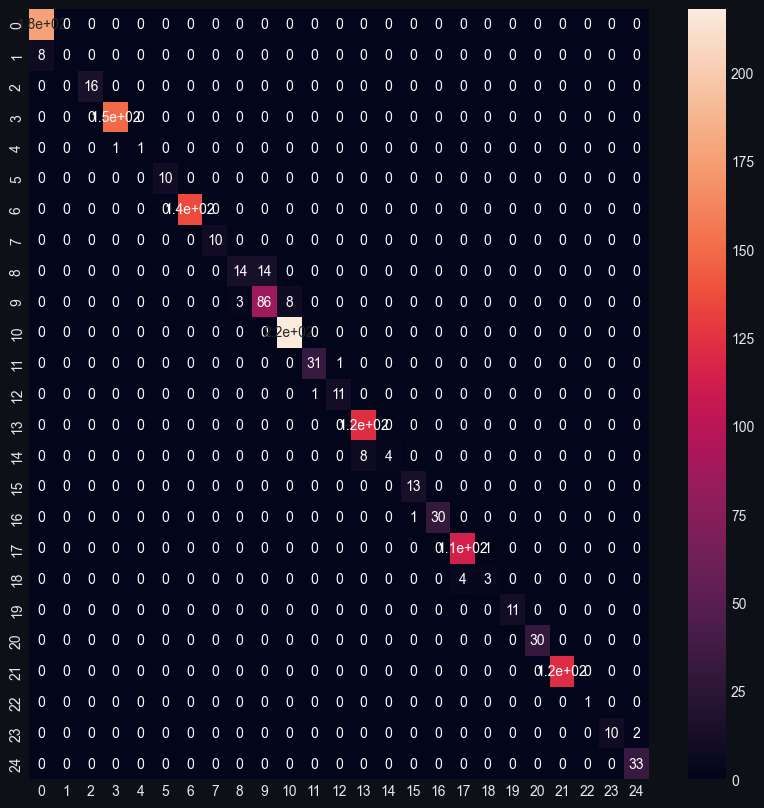

In [7]:
model_name = 'route_y_large_vert_class_v2'
training_root = r'O:\eve_models\training_data\route_y_large_vert_class_v2'
model_file = f'{model_name}/{model_name}_model.h5'
meta_file = f'{model_name}/{model_name}_meta.json'

stats, rendering = build_and_train(root_image_directory=training_root, model_location=model_file, model_name=model_name, epochs=30, resize_ratio=1)
render_cm(stats)
write_rendering(meta_file, rendering)
print(rendering)

save_to_gcp(source_file=model_file, dest_file=f'{model_name}/{model_name}_model.h5')
save_to_gcp(source_file=meta_file, dest_file=f'{model_name}/{model_name}_meta.json')

55
Found 55 files belonging to 3 classes.
Using 44 files for training.
Found 55 files belonging to 3 classes.
Using 11 files for validation.
['second_pos', 'seventh_pos', 'third_pos']
Epoch 1/10
44/44 [==============================] - 1s 10ms/step - loss: 1.1923 - accuracy: 0.5227 - val_loss: 0.9494 - val_accuracy: 0.9091
Epoch 2/10
44/44 [==============================] - 0s 4ms/step - loss: 0.8991 - accuracy: 0.7955 - val_loss: 0.3704 - val_accuracy: 0.9091
Epoch 3/10
44/44 [==============================] - 0s 4ms/step - loss: 0.4179 - accuracy: 0.8182 - val_loss: 0.0487 - val_accuracy: 1.0000
Epoch 4/10
44/44 [==============================] - 0s 4ms/step - loss: 0.1443 - accuracy: 0.9318 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 5/10
44/44 [==============================] - 0s 4ms/step - loss: 0.0521 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 6/10
44/44 [==============================] - 0s 4ms/step - loss: 0.0663 - accuracy: 0.9773 - val_loss: 0.011

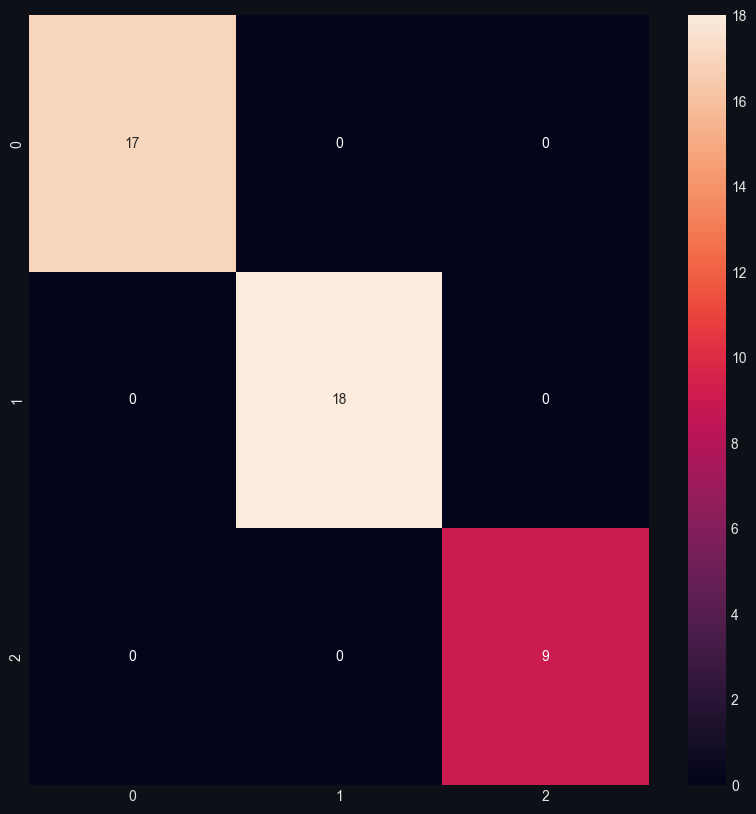

In [16]:
model_name = 'set_dest'
training_root = r'O:\eve_models\training_data\set_dest'
model_file = f'{model_name}/{model_name}_model.h5'
meta_file = f'{model_name}/{model_name}_meta.json'

stats, rendering = build_and_train(root_image_directory=training_root, model_location=model_file, model_name=model_name)
render_cm(stats)
write_rendering(meta_file, rendering)
print(rendering)

save_to_gcp(source_file=model_file, dest_file=f'{model_name}/{model_name}_model.h5')
save_to_gcp(source_file=meta_file, dest_file=f'{model_name}/{model_name}_meta.json')

6
Found 6 files belonging to 2 classes.
Using 5 files for training.
Found 6 files belonging to 2 classes.
Using 1 files for validation.
['empty', 'set_quant']
Epoch 1/10
5/5 [==============================] - 0s 34ms/step - loss: 2.8701 - accuracy: 0.2000 - val_loss: 1.0713 - val_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 0s 9ms/step - loss: 0.8896 - accuracy: 0.4000 - val_loss: 0.9574 - val_accuracy: 0.0000e+00
Epoch 3/10
5/5 [==============================] - 0s 10ms/step - loss: 0.5907 - accuracy: 0.6000 - val_loss: 0.8036 - val_accuracy: 0.0000e+00
Epoch 4/10
5/5 [==============================] - 0s 10ms/step - loss: 0.5198 - accuracy: 0.8000 - val_loss: 0.8314 - val_accuracy: 0.0000e+00
Epoch 5/10
5/5 [==============================] - 0s 10ms/step - loss: 0.7532 - accuracy: 0.6000 - val_loss: 1.0828 - val_accuracy: 0.0000e+00
Epoch 6/10
5/5 [==============================] - 0s 10ms/step - loss: 0.4254 - accuracy: 0.6000 - val_loss: 0.6271 - val_accur

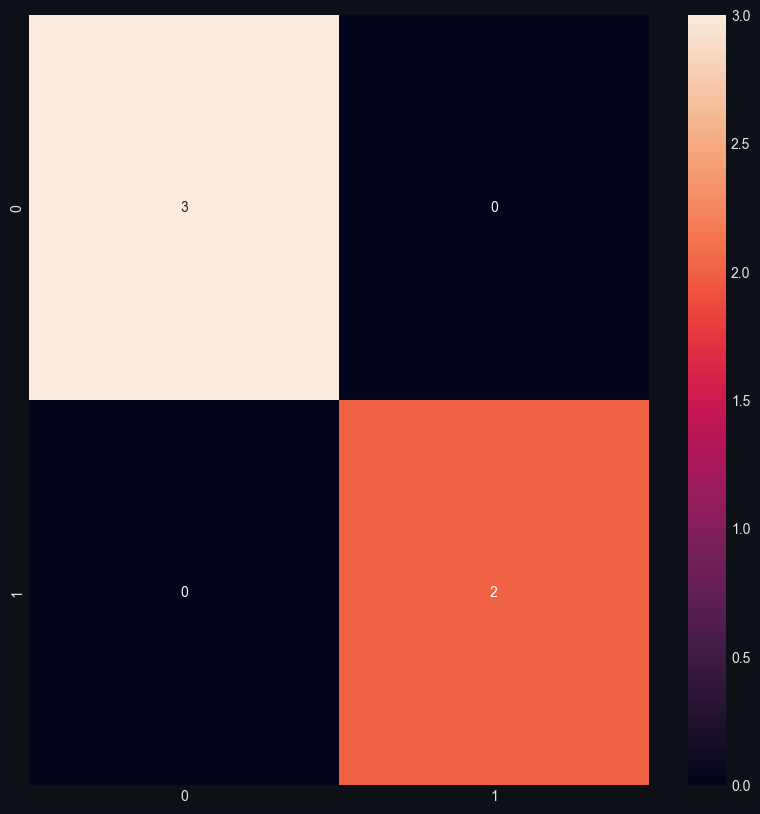

In [17]:
model_name = 'hanger_menus'
training_root = r'O:\eve_models\training_data\hanger_menus'
model_file = f'{model_name}/{model_name}_model.h5'
meta_file = f'{model_name}/{model_name}_meta.json'

stats, rendering = build_and_train(root_image_directory=training_root, model_location=model_file, model_name=model_name)
render_cm(stats)
write_rendering(meta_file, rendering)
print(rendering)

save_to_gcp(source_file=model_file, dest_file=f'{model_name}/{model_name}_model.h5')
save_to_gcp(source_file=meta_file, dest_file=f'{model_name}/{model_name}_meta.json')

292
Found 292 files belonging to 7 classes.
Using 234 files for training.
Found 292 files belonging to 7 classes.
Using 58 files for validation.
['dock_now', 'invalid', 'jump_though_first', 'jump_through_second', 'no_action', 'warp_to_dock_3', 'warp_to_dock_4']
Epoch 1/10
234/234 [==============================] - 1s 4ms/step - loss: 1.1858 - accuracy: 0.6026 - val_loss: 0.3507 - val_accuracy: 0.9828
Epoch 2/10
234/234 [==============================] - 1s 3ms/step - loss: 0.3128 - accuracy: 0.8932 - val_loss: 0.2119 - val_accuracy: 0.9828
Epoch 3/10
234/234 [==============================] - 1s 3ms/step - loss: 0.1226 - accuracy: 0.9744 - val_loss: 0.2825 - val_accuracy: 0.9828
Epoch 4/10
234/234 [==============================] - 1s 3ms/step - loss: 0.1251 - accuracy: 0.9744 - val_loss: 0.2906 - val_accuracy: 0.9828
Epoch 5/10
234/234 [==============================] - 1s 3ms/step - loss: 0.0609 - accuracy: 0.9786 - val_loss: 0.4077 - val_accuracy: 0.9828
Epoch 6/10
234/234 [========

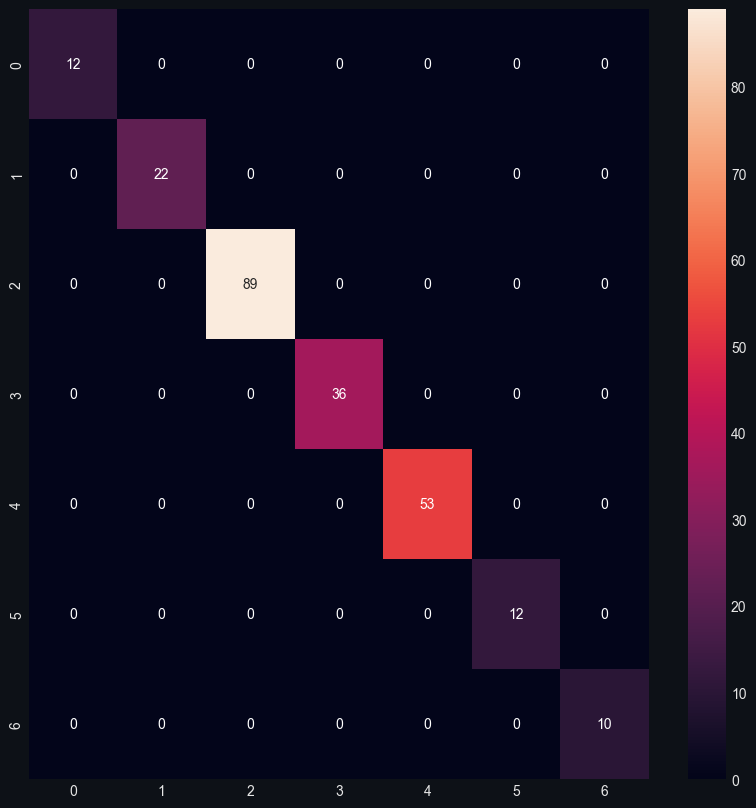

In [18]:
model_name = 'nav_options'
training_root = r'O:\eve_models\training_data\nav_options'
model_file = f'{model_name}/{model_name}_model.h5'
meta_file = f'{model_name}/{model_name}_meta.json'

stats, rendering = build_and_train(root_image_directory=training_root, model_location=model_file, model_name=model_name)
render_cm(stats)
write_rendering(meta_file, rendering)
print(rendering)

save_to_gcp(source_file=model_file, dest_file=f'{model_name}/{model_name}_model.h5')
save_to_gcp(source_file=meta_file, dest_file=f'{model_name}/{model_name}_meta.json')

492
Found 492 files belonging to 5 classes.
Using 394 files for training.
Found 492 files belonging to 5 classes.
Using 98 files for validation.
['both_running', 'invalid', 'miner_1_running', 'miner_2_running', 'no_miners_running']
Epoch 1/10
394/394 [==============================] - 2s 4ms/step - loss: 1.4188 - accuracy: 0.5305 - val_loss: 1.3170 - val_accuracy: 0.5000
Epoch 2/10
394/394 [==============================] - 1s 4ms/step - loss: 1.2086 - accuracy: 0.5635 - val_loss: 1.1210 - val_accuracy: 0.6633
Epoch 3/10
394/394 [==============================] - 2s 4ms/step - loss: 0.6378 - accuracy: 0.7462 - val_loss: 0.1833 - val_accuracy: 0.9694
Epoch 4/10
394/394 [==============================] - 1s 3ms/step - loss: 0.2628 - accuracy: 0.8959 - val_loss: 0.1228 - val_accuracy: 0.9898
Epoch 5/10
394/394 [==============================] - 1s 3ms/step - loss: 0.1430 - accuracy: 0.9569 - val_loss: 0.0978 - val_accuracy: 0.9898
Epoch 6/10
394/394 [==============================] - 1s 3

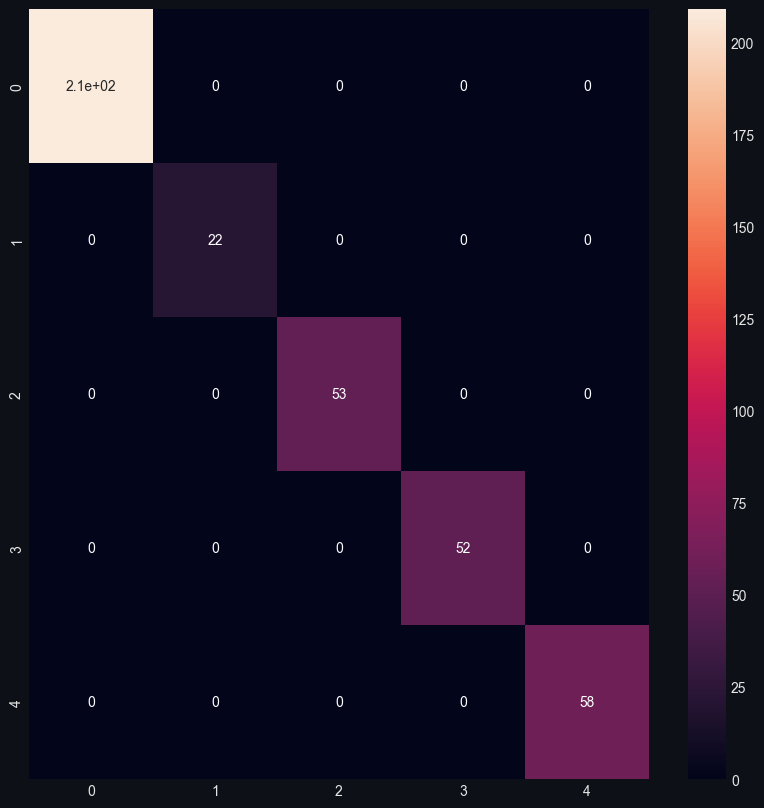

In [19]:
model_name = 'mining_tool_state'
training_root = r'O:\eve_models\training_data\mining_tool_state'
model_file = f'{model_name}/{model_name}_model.h5'
meta_file = f'{model_name}/{model_name}_meta.json'

stats, rendering = build_and_train(root_image_directory=training_root, model_location=model_file, model_name=model_name)
render_cm(stats)
write_rendering(meta_file, rendering)
print(rendering)

save_to_gcp(source_file=model_file, dest_file=f'{model_name}/{model_name}_model.h5')
save_to_gcp(source_file=meta_file, dest_file=f'{model_name}/{model_name}_meta.json')

144
Found 145 files belonging to 4 classes.
Using 116 files for training.
Found 145 files belonging to 4 classes.
Using 29 files for validation.
['char_select', 'connection_lost', 'in_flight', 'in_hanger']
Epoch 1/10
116/116 [==============================] - 1s 5ms/step - loss: 1.0801 - accuracy: 0.6724 - val_loss: 0.3711 - val_accuracy: 0.9655
Epoch 2/10
116/116 [==============================] - 0s 4ms/step - loss: 0.3038 - accuracy: 0.9138 - val_loss: 0.0442 - val_accuracy: 0.9655
Epoch 3/10
116/116 [==============================] - 0s 4ms/step - loss: 0.0300 - accuracy: 0.9828 - val_loss: 4.3946e-05 - val_accuracy: 1.0000
Epoch 4/10
116/116 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 1.5808e-04 - val_accuracy: 1.0000
Epoch 5/10
116/116 [==============================] - 0s 4ms/step - loss: 0.0747 - accuracy: 0.9741 - val_loss: 6.2386e-04 - val_accuracy: 1.0000
Epoch 6/10
116/116 [==============================] - 0s 4ms/step - loss

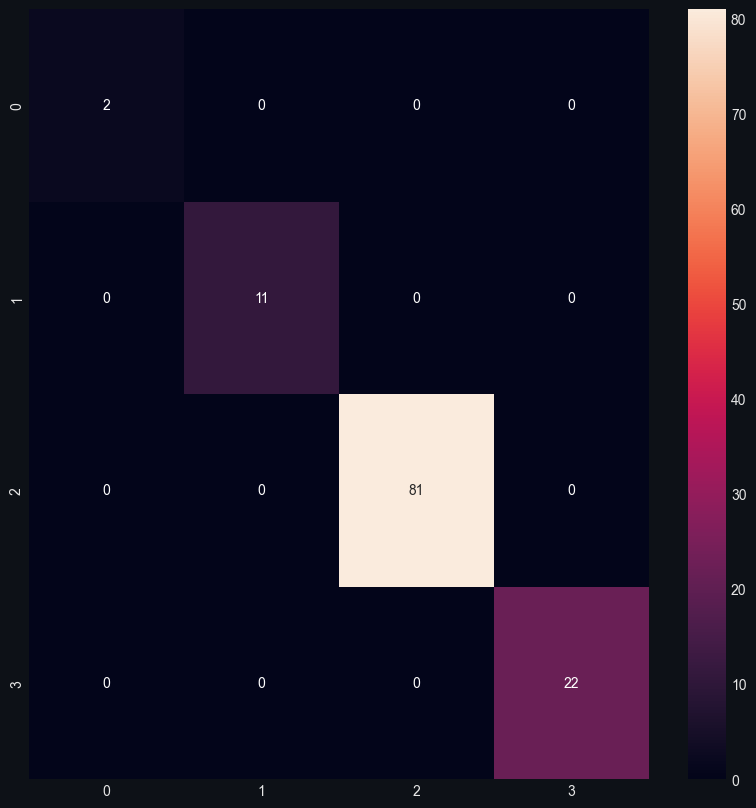

In [20]:
model_name = 'game_state'
training_root = r'O:\eve_models\training_data\game_state'
model_file = f'{model_name}/{model_name}_model.h5'
meta_file = f'{model_name}/{model_name}_meta.json'

stats, rendering = build_and_train(root_image_directory=training_root, model_location=model_file, model_name=model_name)
render_cm(stats)
write_rendering(meta_file, rendering)
print(rendering)

save_to_gcp(source_file=model_file, dest_file=f'{model_name}/{model_name}_model.h5')
save_to_gcp(source_file=meta_file, dest_file=f'{model_name}/{model_name}_meta.json')